## Simulation of the Higgs' boson detection experiment

### This notebook is licensed  under [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1) © 2024 by Xavier Luri (ICCUB)

See: http://www.sciencedirect.com/science/article/pii/S037026931200857X

Physics Letters B
      Volume 716, Issue 1, 17 September 2012, Pages 1-29

The following code produces a distribution of events that 
__qualitatively__ reproduces the values in Figure 4 of the above
paper. It is not base on any actual physics but can be used
for the purposes of this course to emulate the kind of distribution
resulting from the experiment

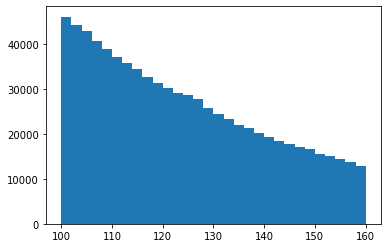

In [6]:
%matplotlib inline
import scipy.stats as sp
import matplotlib.pyplot as plt
import numpy as np

# Higgs' boson mass in GeV 
mH= 126.5

#Total number of events generated and ratios background/signal
Ntot = 80000
Nbg = int(Ntot*0.995)
Ns = int(Ntot*0.005)

# Max and min GeV of the sample
min= 100
max= 160

# Rate
tau= 0.0218

# Generating background (truncated exponential)
bg_dist= sp.truncexpon(b=(max-min)*tau, loc=min, scale=1./tau)
bg_points= bg_dist.rvs(Nbg)

# Generating signal (gaussian) around mH. We take a sigma of 2.
sig_dist= sp.norm(loc=mH,scale=2)
sig_points= sig_dist.rvs(Ns)

# Join background and signal in a single sample
all_points= np.concatenate( (bg_points,sig_points) )

# Histogram of global sample
# Note: the binning here is the one used in Figure 4
_= plt.hist(all_points,bins=int((max-min)/2))